# Quick Analysis of Facebook Page Data

by Max Woolf (@minimaxir)

In [9]:
source("Rstart.R")
options(repr.plot.mimetypes = 'image/png', repr.plot.width=4, repr.plot.height=3, repr.plot.res=300)

# Import Facebook data for the 2 sources

In [10]:
df_buzzfeed <- read_csv("buzzfeed_facebook_statuses.csv", col_types = list(status_published = col_datetime())) %>%
                    filter(status_published >= '2012-01-01 00:00:00') %>%
                    mutate(month = sprintf('%s-01', substr(status_published,1,7)))

df_buzzfeed %>% tail(1)

df_nytimes <- read_csv("nytimes_facebook_statuses.csv", col_types = list(status_published = col_datetime())) %>%
                    filter(status_published >= '2012-01-01 00:00:00') %>%
                    mutate(month = sprintf('%s-01', substr(status_published,1,7)))

df_nytimes %>% tail(1)

,status_id,status_message,link_name,status_type,status_link,status_published,num_likes,num_comments,num_shares,month
1,21898300328_193228390772537,"Have you made your New Year's ""Revolution"" yet?",20 People Who Don't Know What A New Years Resolution Is,link,http://www.buzzfeed.com/daves4/20-people-who-dont-know-what-a-new-years-resoluti,2012-01-01 08:12:52,13,4,6,2012-01-01


,status_id,status_message,link_name,status_type,status_link,status_published,num_likes,num_comments,num_shares,month
1,5281959998_164895786957467,"Which word best describes each Super Bowl ad? Vote on the latest ads, and see how others voted, in our live blog. What is your favorite ad so far? Least favorite?",Game Breaks: Vote on Super Bowl Ads,link,http://projects.nytimes.com/superbowl/2012/dashboard?smid=fb-nytimes,2012-02-05 19:16:46,400,221,5,2012-02-01


# Aggregate Medians over time, then combine data frames for long format

In [11]:
df_buzzfeed_medians <- df_buzzfeed %>%
                        group_by(month) %>%
                        summarize(median_likes = median(num_likes)) %>%
                        mutate(site = "BuzzFeed")

df_nytimes_medians <- df_nytimes %>%
                        group_by(month) %>%
                        summarize(median_likes = median(num_likes)) %>%
                        mutate(site = "NYTimes")


df <- union(df_buzzfeed_medians, df_nytimes_medians)

df %>% arrange(desc(median_likes)) %>% head(10)

,month,median_likes,site
1,2015-03-01,6071,BuzzFeed
2,2015-06-01,5534.5,BuzzFeed
3,2015-07-01,5137,BuzzFeed
4,2015-05-01,5076,BuzzFeed
5,2015-02-01,5054.5,BuzzFeed
6,2014-06-01,5035,BuzzFeed
7,2015-01-01,4979,BuzzFeed
8,2014-09-01,4789,BuzzFeed
9,2014-01-01,4481,BuzzFeed
10,2014-11-01,4217.5,BuzzFeed


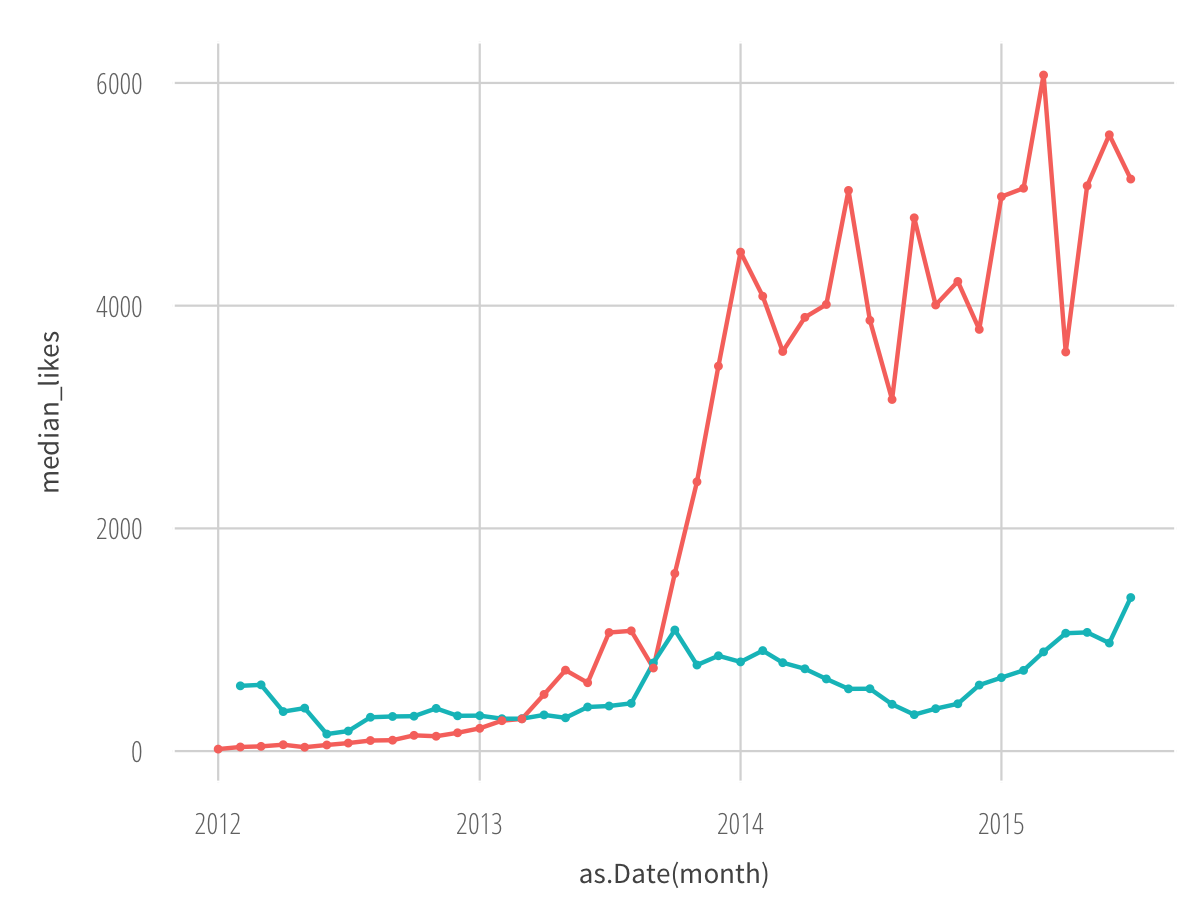

In [12]:
plot <- ggplot(df, aes(x = as.Date(month), y = median_likes, color=site)) +
            geom_line() +
            geom_point(size = 1) +
            fte_theme()

print(plot)

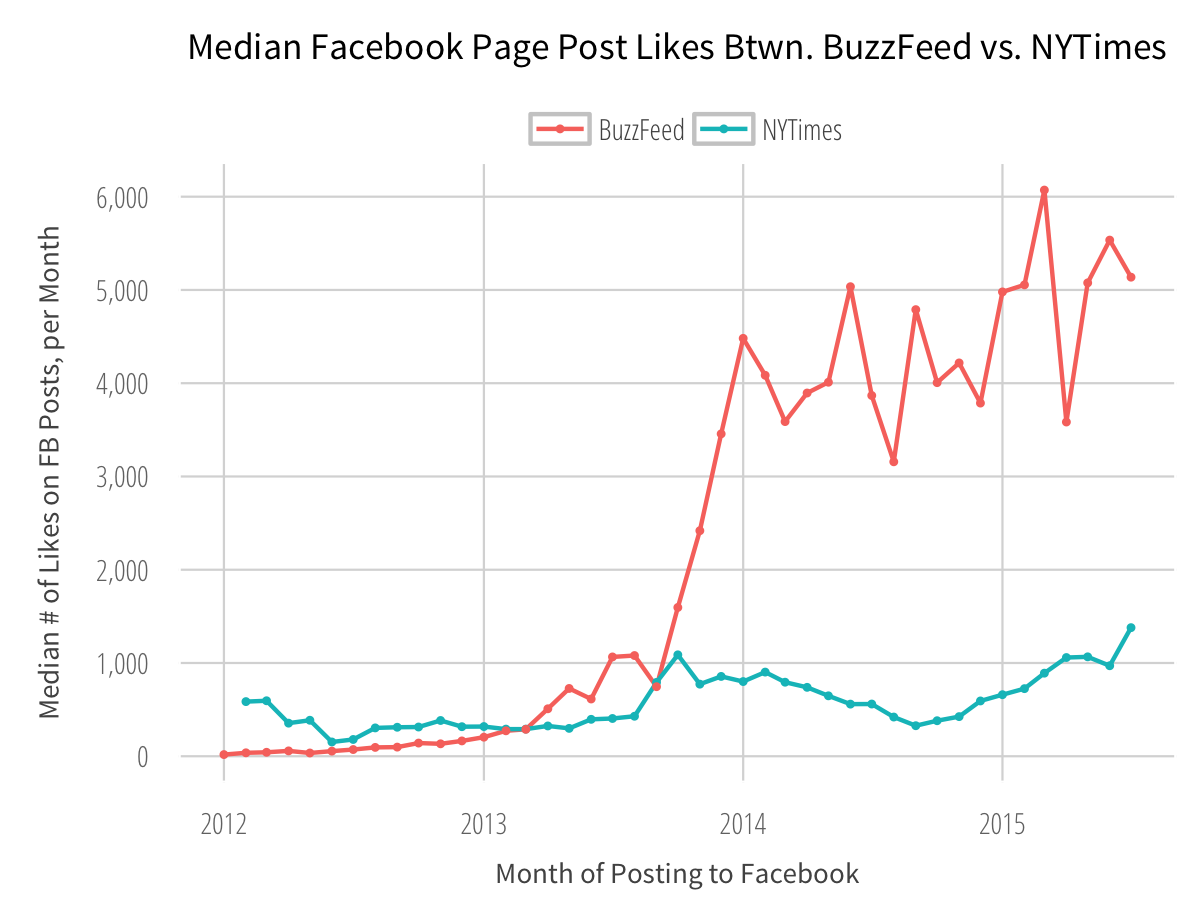

In [13]:
plot <- plot +
            scale_y_continuous(labels = comma, breaks = seq(0, 6000, by=1000)) +
            theme(legend.title = element_blank(), legend.position="top", legend.direction="horizontal", legend.key.width=unit(0.5, "cm"), legend.key.height=unit(0.25, "cm"), legend.margin=unit(-0.5,"cm")) +
            labs(x = "Month of Posting to Facebook", y = "Median # of Likes on FB Posts, per Month", title = "Median Facebook Page Post Likes Btwn. BuzzFeed vs. NYTimes")
            
                  
print(plot)
max_save(plot, "nytimes_buzz_fb", "Facebook Graph API")